In [1]:
from math import sin
from random import random
import pandas as pd
import pickle
import json

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform

data = pd.read_json('data/train/dataset-000.json')
df_specs = data['specs']
values = []
for row in df_specs:
    row_values = list(row.values())
    values = values + row_values
embed = pickle.load(open('data/embeddings/values/value_embeddings0.pkl', 'rb'))

list_x = embed[:, 0]
list_y = embed[:, 1]
desc = values

source = ColumnDataSource(data=dict(x=list_x, y=list_y, desc=desc))
hover = HoverTool(tooltips=[
    ('desc', '@desc'),
])
mapper = LinearColorMapper(palette=plasma(256), low=min(list_y), high=max(list_y))

p = figure(width=1000, height=1000, tools=[hover])
p.circle('x', 'y', size=10, source=source)

output_notebook()
show(p)

Loading BokehJS ...

# BIRCH

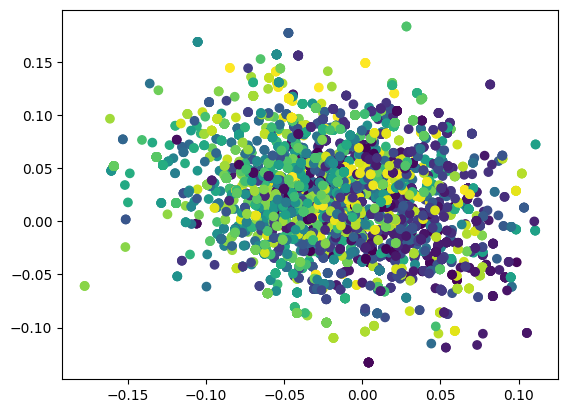

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

brc = Birch(n_clusters=None)
brc.fit(embed)

out = brc.predict(embed)

plt.scatter(embed[:,0], embed[:,1], c=out)
plt.show() 

# DBSCAN

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.1, min_samples=10).fit(embed)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 141
Estimated number of noise points: 3603


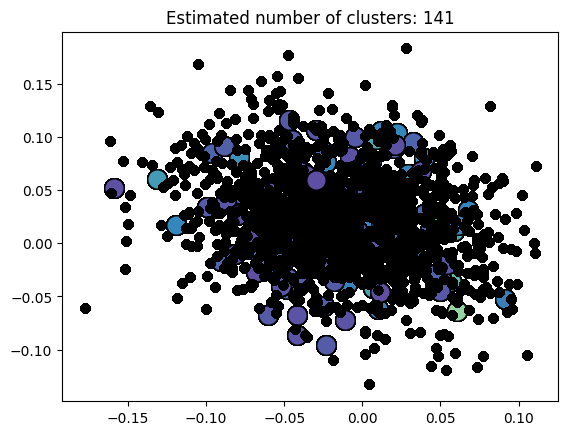

In [4]:
import matplotlib.pyplot as plt 

unique_labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# AffinityPropagation

In [5]:
from sklearn.cluster import AffinityPropagation
import numpy as np

clustering = AffinityPropagation(random_state=5).fit(embed)
clustering

AffinityPropagation(random_state=5)
clustering.labels_

res = clustering.predict(embed)

clustering.cluster_centers_

plt.scatter(embed[:,0], embed[:,1], c=res)
plt.show() 